In [1]:
# imports

import pandas as pd
import requests
import csv
import json 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from bs4 import BeautifulSoup
import geopandas as gpd
import plotly.express as px
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

In [2]:
# get data from website
CA = requests.get("https://api.covidtracking.com/v2/states/ca/daily/simple.json")
TX = requests.get("https://api.covidtracking.com/v2/states/tx/daily/simple.json")

In [3]:
# getting json data we want
texas = TX.json()['data']
cali = CA.json()['data']

In [4]:
# get data for texas into an array
TX_array = []
temp = []
for item in texas:
    if temp != []:
        TX_array.append(temp)
    # reset temp array
    temp = []
    
    #add needed values to our array
    temp.append(item['date'])
    temp.append(item['cases']['total'])
    temp.append(item['outcomes']['recovered'])
    temp.append(item['outcomes']['hospitalized']['currently'])
    temp.append(item['outcomes']['hospitalized']['in_icu']['currently'])
    temp.append(item['outcomes']['death']['total'])

# replaces NoneTypes with 0
# NoneTypes are when there is no data collected, like deaths at the begining are all 0
for index1, i in enumerate(TX_array):
    for index2, j in enumerate(i):
        if type(j) is type(None):
            TX_array[index1][index2] = 0
TX_array.pop(52)
x = 5

In [5]:
# get data for California into an array
CA_array = []
temp = []
for item in cali:
    if temp != []:
        CA_array.append(temp)
    # reset temp array
    temp = []
    
    #add needed values to our array
    temp.append(item['date'])
    temp.append(item['cases']['total'])
    temp.append(item['outcomes']['recovered'])
    temp.append(item['outcomes']['hospitalized']['currently'])
    temp.append(item['outcomes']['hospitalized']['in_icu']['currently'])
    temp.append(item['outcomes']['death']['total'])
    
# replaces NoneTypes with 0
# NoneTypes are when there is no data collected, like deaths at the begining are all 0
for index1, i in enumerate(CA_array):
    for index2, j in enumerate(i):
        if type(j) is type(None):
            CA_array[index1][index2] = 0
            

In [6]:
# make dates easy to put in order
# for index, item in enumerate(TX_array):
#     item[0] = int(item[0].replace("-",""))
#     TX_array[index][0] = item[0]
    
# for index, item in enumerate(CA_array):
#     item[0] = int(item[0].replace("-",""))
#     CA_array[index][0] = item[0]

for index, item in enumerate(CA_array):
    dt = datetime.strptime(item[0], '%Y-%m-%d')
    dt = time.mktime(dt.timetuple())
    item[0] = dt
    CA_array[index][0] = item[0]
    
for index, item in enumerate(TX_array):
    dt = datetime.strptime(item[0], '%Y-%m-%d')
    dt = time.mktime(dt.timetuple())
    item[0] = dt
    TX_array[index][0] = item[0]


In [7]:
# making it a dataframe because I know how to work with those
column_values = ['date', 'cases', 'recovered', 'hospitalized', 'icu', 'death']
TxArray = np.array(TX_array)

Tx_df = pd.DataFrame(data = TxArray, 
                  columns = column_values)

Tx_df['date'] = pd.to_datetime(Tx_df['date'], unit='s')

CaArray = np.array(CA_array)

Ca_df = pd.DataFrame(data = CaArray, 
                  columns = column_values)

Ca_df['date'] = pd.to_datetime(Ca_df['date'], unit='s')

In [8]:
# making multipliers to make things percentages
Tx_toPercent = (1/295300)
Ca_toPercent = (1/392400)

# Cases in California and Texas

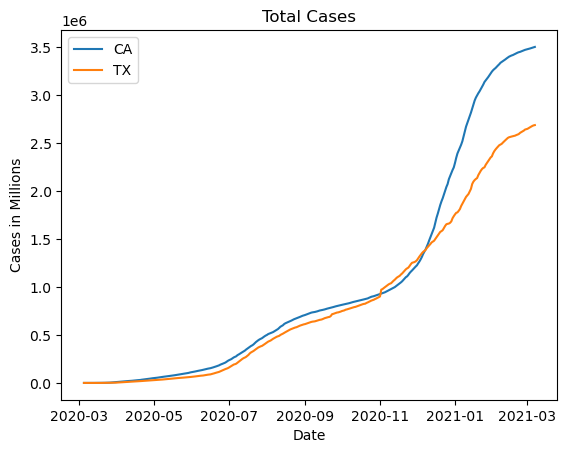

In [9]:
# Plot Cases
plt.plot(Ca_df.date, Ca_df.cases, label="CA")
plt.plot(Ca_df.date, Tx_df.cases, label="TX")
plt.legend()
plt.title("Total Cases")
plt.xlabel("Date")
plt.ylabel("Cases in Millions")

plt.show()

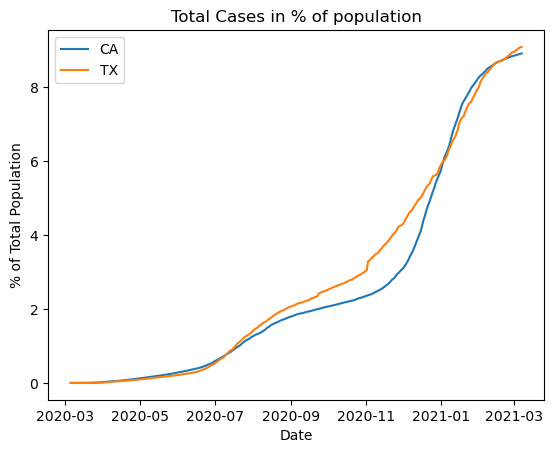

In [10]:
# Plot Cases %
plt.plot(Ca_df.date, (Ca_df.cases * Ca_toPercent), label="CA")
plt.plot(Ca_df.date, (Tx_df.cases * Tx_toPercent), label="TX")
plt.legend()
plt.title("Total Cases in % of population")
plt.xlabel("Date")
plt.ylabel("% of Total Population")

plt.show()

# People Hospitalized

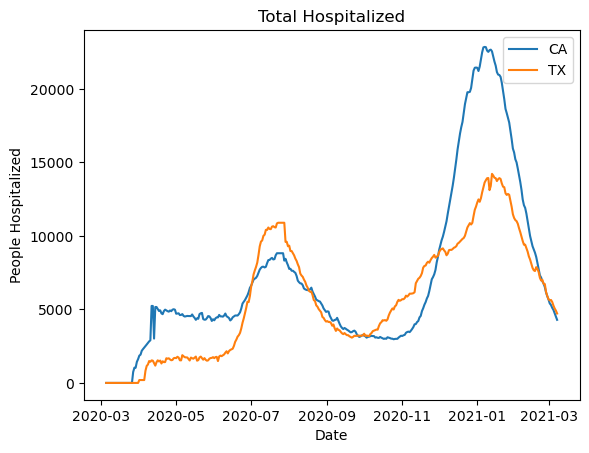

In [11]:
# Plot Hospitalized
plt.plot(Ca_df.date, Ca_df.hospitalized, label="CA")
plt.plot(Ca_df.date, Tx_df.hospitalized, label="TX")
plt.legend()
plt.title("Total Hospitalized")
plt.xlabel("Date")
plt.ylabel("People Hospitalized")

plt.show()

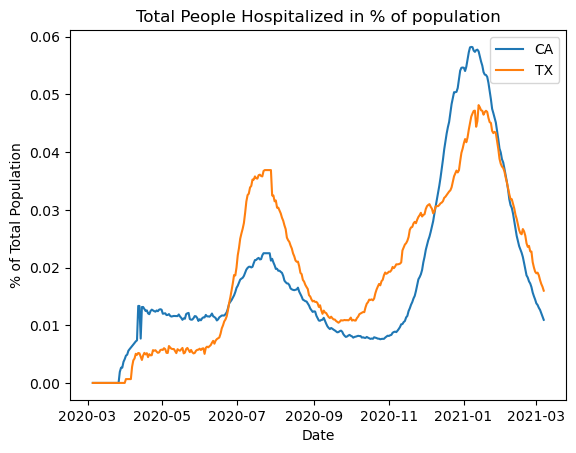

In [12]:
# Plot people hospitalized %
plt.plot(Ca_df.date, (Ca_df.hospitalized * Ca_toPercent), label="CA")
plt.plot(Ca_df.date, (Tx_df.hospitalized * Tx_toPercent), label="TX")
plt.legend()
plt.title("Total People Hospitalized in % of population")
plt.xlabel("Date")
plt.ylabel("% of Total Population")

plt.show()

# People in the ICU

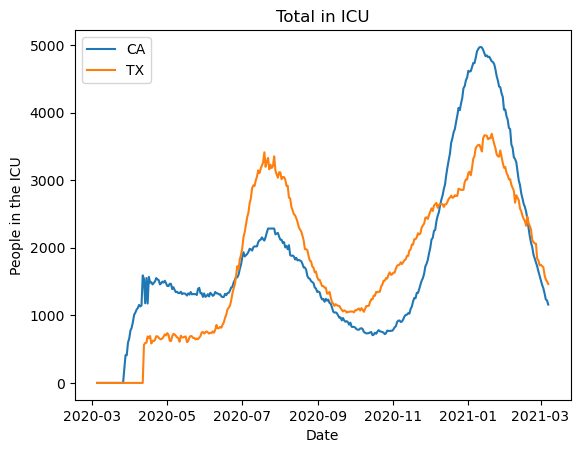

In [13]:
# Plot ICU
plt.plot(Ca_df.date, Ca_df.icu, label="CA")
plt.plot(Ca_df.date, Tx_df.icu, label="TX")
plt.legend()
plt.title("Total in ICU")
plt.xlabel("Date")
plt.ylabel("People in the ICU")

plt.show()

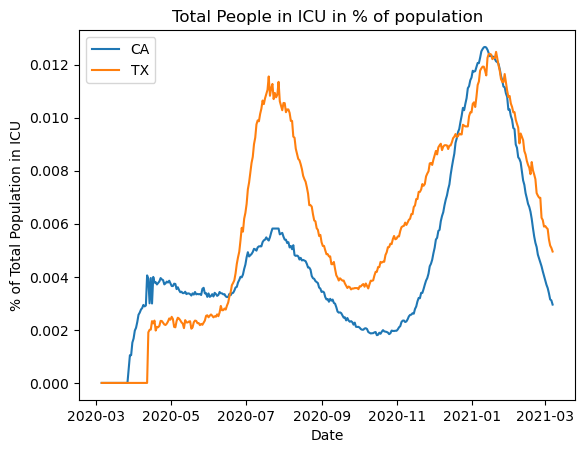

In [14]:
# Plot of people in ICU in %
plt.plot(Ca_df.date, (Ca_df.icu * Ca_toPercent), label="CA")
plt.plot(Ca_df.date, (Tx_df.icu * Tx_toPercent), label="TX")
plt.legend()
plt.title("Total People in ICU in % of population")
plt.xlabel("Date")
plt.ylabel("% of Total Population in ICU")

plt.show()

# Deaths

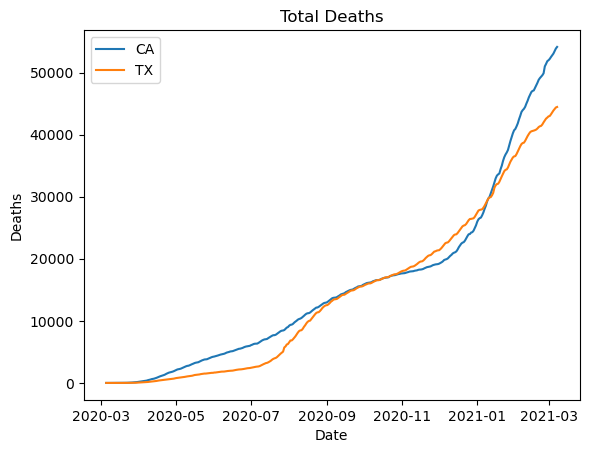

In [15]:
#Plot Deaths
plt.plot(Ca_df.date, Ca_df.death, label="CA")
plt.plot(Ca_df.date, Tx_df.death, label="TX")
plt.legend()
plt.title("Total Deaths")
plt.xlabel("Date")
plt.ylabel("Deaths")

plt.show()

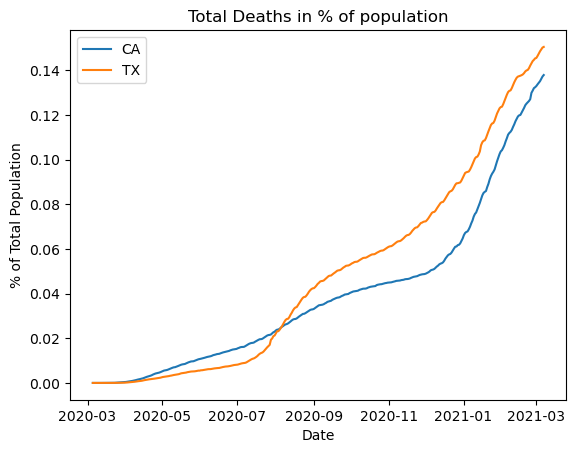

In [16]:
# Plot Death %
plt.plot(Ca_df.date, (Ca_df.death * Ca_toPercent), label="CA")
plt.plot(Ca_df.date, (Tx_df.death * Tx_toPercent), label="TX")
plt.legend()
plt.title("Total Deaths in % of population")
plt.xlabel("Date")
plt.ylabel("% of Total Population")

plt.show()

# Cases per Death

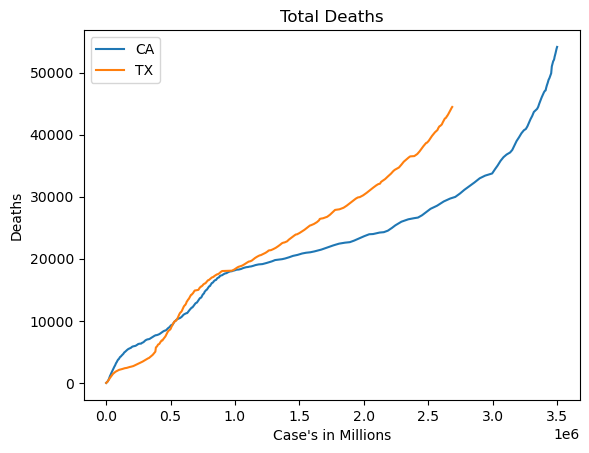

In [28]:
#Plot Cases v Death
plt.plot(Ca_df.cases, Ca_df.death, label="CA")
plt.plot(Tx_df.cases, Tx_df.death, label="TX")
plt.legend()
plt.title("Total Deaths")
plt.xlabel("Case's in Millions")
plt.ylabel("Deaths")

plt.show()

# Hospitalized vs ICU

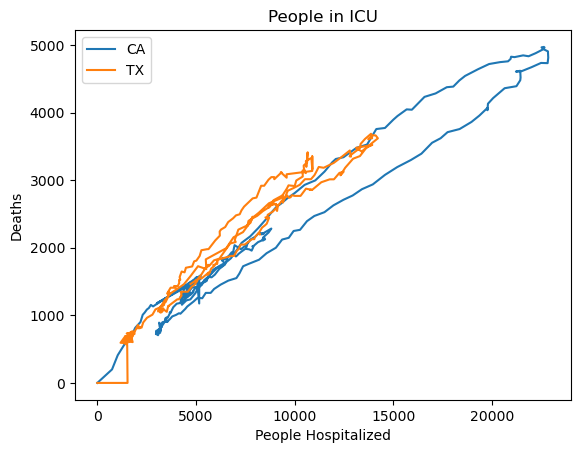

In [35]:
#Plot Cases v Death
plt.plot(Ca_df.hospitalized, Ca_df.icu, label="CA")
plt.plot(Tx_df.hospitalized, Tx_df.icu, label="TX")
plt.legend()
plt.title("People in ICU")
plt.xlabel("People Hospitalized")
plt.ylabel("Deaths")

plt.show()

In [17]:
# Send a GET request
url = "https://covidtracking.com/data/api"
response = requests.get(url)

# Check for successful status code 200
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all (links)
    links = soup.find_all('a')

    # Extract and print the href attribute of each link
    for link in links:
        href = link.get('href')
        # Check if the link starts with "https"
        if href and href.startswith('https'):
            print(href)
else:
    print(f"Failed to retrieve the webpage. Status Code: {response.status_code}")


https://apichanges.covidtracking.com/
https://covidtracking.com/analysis-updates/covid-tracking-project-end-march-7
https://docs.google.com/spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/pubhtml#
https://api.covidtracking.com/v1/us/daily.json
https://api.covidtracking.com/v1/us/daily.csv
https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf
https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/
https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/08/05/
https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/
https://www.cdc.gov/coronavirus/2019-ncov/hcp/disposition-in-home-patients.html
https://docs.google.com/spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/pubhtml#
https://api.covidtracking.com/v1/us/current.json
http

In [18]:
# URL of the JSON API
url = " https://api.covidtracking.com/v1/states/daily.json"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the JSON data
    json_data = response.json()

    # Write the JSON data to a file
    with open("covid_state.json", "w") as file:
        json.dump(json_data, file)

    print("JSON data has been successfully written to covid_state.json file.")
else:
    print(f"Failed to retrieve JSON data. Status Code: {response.status_code}")


JSON data has been successfully written to covid_state.json file.


In [19]:
# Get data from json
data = []
with open('./covid_state.json', 'r') as json_file:
    for line in json_file:
        data=json.loads(line)

df = pd.DataFrame(data)

In [20]:
df.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized',
       'hospitalizedDischarged', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 

# Map of Deaths in the US

In [21]:
df_grouped = df.groupby('state')['death'].sum().reset_index()

# Specify range for color scale
color_range = (df_grouped['death'].min(), df_grouped['death'].max())

# Plot choropleth map
fig = px.choropleth(df_grouped,
                    locations='state',
                    locationmode="USA-states",
                    color='death',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title='Number of death Cases in USA States',
                    range_color=color_range)

# Adjust color axis
fig.update_layout(coloraxis_colorbar=dict(
    title="death Cases"
))

# Show the plot
fig.show()


Pearson Correlation Coefficient: 0.8809945150478719
P-value: 0.0


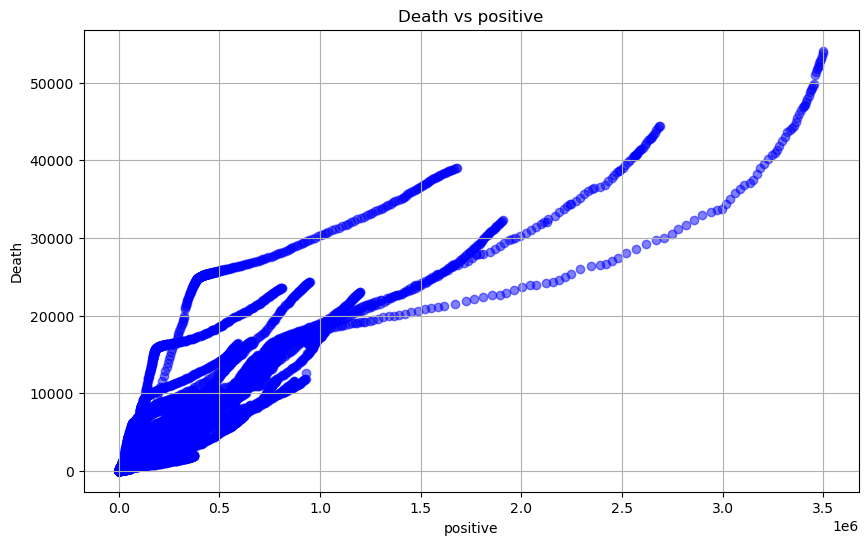

In [22]:
# Calculate Pearson correlation coefficient
df_cleaned = df.dropna(subset=['positive', 'death'])
correlation_coefficient, p_value = pearsonr(df_cleaned['positive'], df_cleaned['death'])
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)
# Plotting Death vs positive
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['positive'], df_cleaned['death'], color='blue', alpha=0.5)
plt.title('Death vs positive')
plt.xlabel('positive')
plt.ylabel('Death')
plt.grid(True)
plt.show()

Pearson Correlation Coefficient: 0.9099757845969615
P-value: 0.0


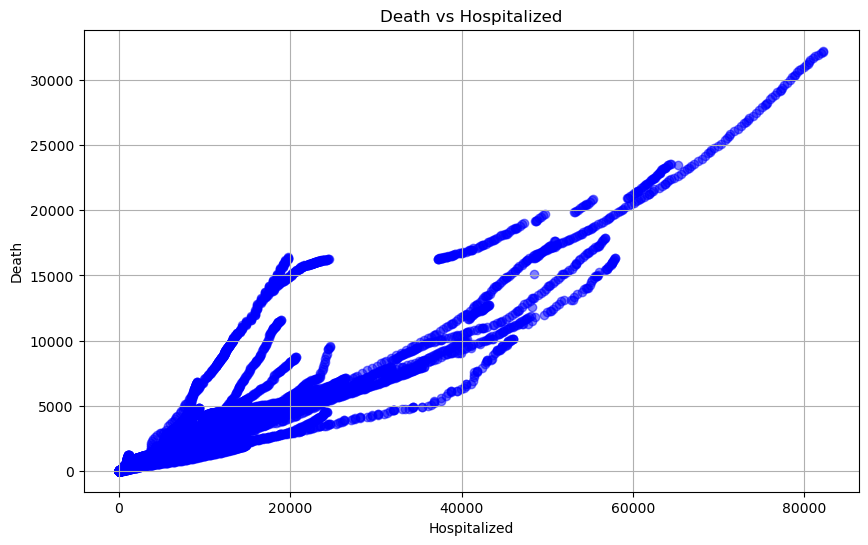

In [23]:
# Calculate Pearson correlation coefficient
df_cleaned = df.dropna(subset=['hospitalized', 'death'])
correlation_coefficient, p_value = pearsonr(df_cleaned['hospitalized'], df_cleaned['death'])
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)
# Plotting Death vs Hospitalized
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['hospitalized'], df_cleaned['death'], color='blue', alpha=0.5)
plt.title('Death vs Hospitalized')
plt.xlabel('Hospitalized')
plt.ylabel('Death')
plt.grid(True)
plt.show()


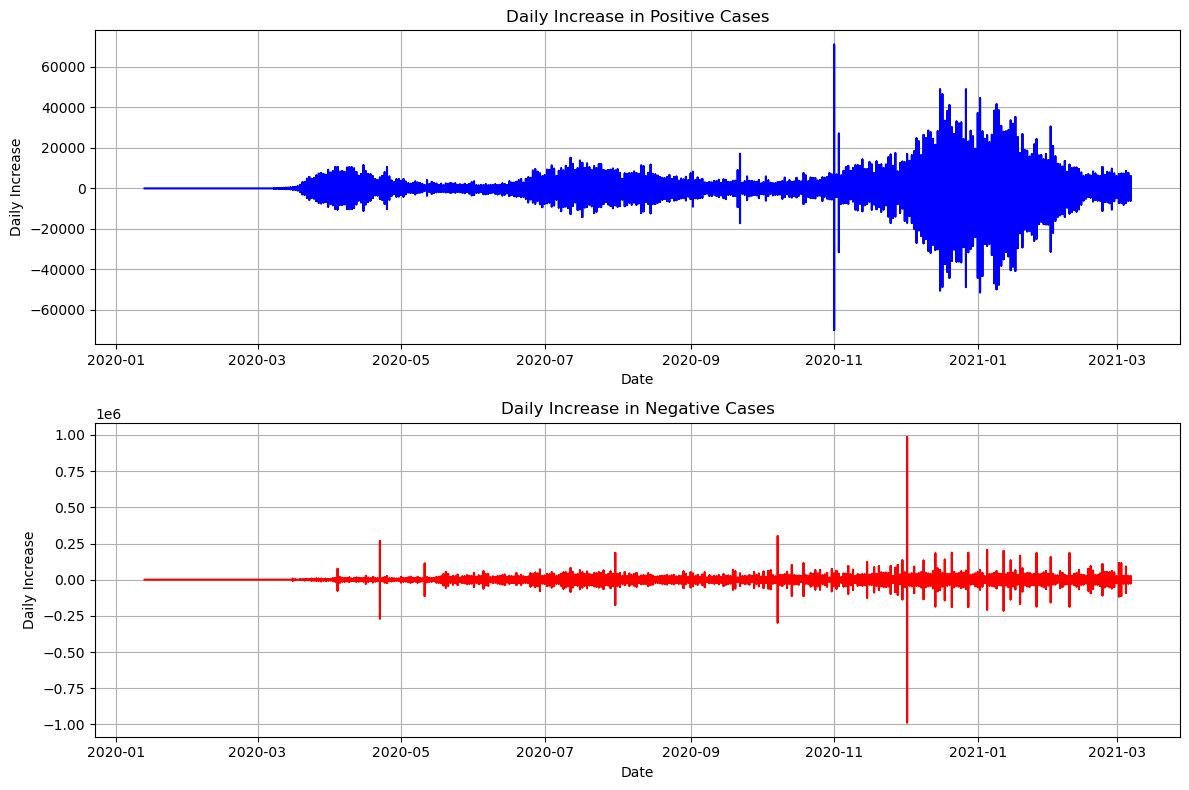

NameError: name 'stats' is not defined

In [24]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Calculate daily increases in positive and negative cases
df['daily_positive_increase'] = df['positiveIncrease'].diff()
df['daily_negative_increase'] = df['negativeIncrease'].diff()

# Plotting
plt.figure(figsize=(12, 8))

# Plot daily increase in positive cases
plt.subplot(2, 1, 1)
plt.plot(df['date'], df['daily_positive_increase'], color='blue')
plt.title('Daily Increase in Positive Cases')
plt.xlabel('Date')
plt.ylabel('Daily Increase')
plt.grid(True)

# Plot daily increase in negative cases
plt.subplot(2, 1, 2)
plt.plot(df['date'], df['daily_negative_increase'], color='red')
plt.title('Daily Increase in Negative Cases')
plt.xlabel('Date')
plt.ylabel('Daily Increase')
plt.grid(True)
plt.tight_layout()
plt.show()

# Perform t-test
t_statistic, p_value = stats.ttest_ind(daily_positive_increase, daily_negative_increase)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)